In [11]:
import os.path
import pickle
import re
import json
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set()

In [26]:
os.chdir(r"C:\Users\aiah2\Downloads")

In [27]:
with open('finalData.pkl', 'rb') as f:
    data = pickle.load(f)

In [28]:
data.drop(columns = ['tripID','stopCode', 'nextStopCode', 'pre_dt2', 'pre_dt', 'LINE_SHORT_NAME', 'actualArrivalTime', 'd_date', 'stopOrder',
                     'oDoor', 'cDoor','actualDepartureTime', 'Linkref',  'i', 'OpenDoorDateTime', 'CloseDoorDateTime'] , axis=1, inplace = True)

In [29]:
friday = data[data.DayInWeek_friday == 1]
saturday = data[data.DayInWeek_saturday == 1]
sunday = data[data.DayInWeek_sunday == 1]
monday = data[data.DayInWeek_monday == 1]
tuesday = data[data.DayInWeek_tuesday == 1]
wednesday = data[data.DayInWeek_wednesday == 1]
thursday = data[data.DayInWeek_thursday == 1]

In [30]:
data

,direction,StopSequence,PassengersUpSum,PassengersDownSum,PassengersContinue,timeSpent,DayInWeek_friday,DayInWeek_monday,DayInWeek_saturday,DayInWeek_sunday,DayInWeek_thursday,DayInWeek_tuesday,DayInWeek_wednesday,targetTime,preD1,preD2
2,1,3,5,0,7,16.0,0,0,0,1,0,0,0,34986,34935,34870
3,1,4,3,0,10,12.0,0,0,0,1,0,0,0,35065,35014,34935
4,1,5,8,0,18,14.0,0,0,0,1,0,0,0,35142,35099,35014
5,1,6,3,0,21,10.0,0,0,0,1,0,0,0,35195,35169,35099
6,1,7,6,1,26,21.0,0,0,0,1,0,0,0,35308,35246,35169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141270,0,15,0,1,0,5.0,0,0,1,0,0,0,0,67113,67062,66991
1141275,0,20,3,0,3,7.0,0,0,1,0,0,0,0,67337,67318,67282
1141276,0,21,1,0,4,5.0,0,0,1,0,0,0,0,67384,67359,67318
1141279,0,24,0,3,1,7.0,0,0,1,0,0,0,0,67504,67479,67434


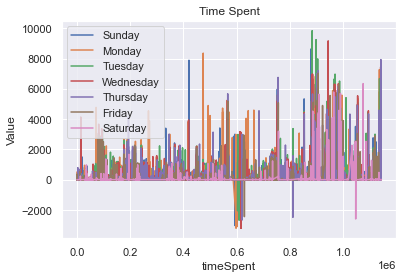

In [31]:
plt.plot(sunday['timeSpent'], label='Sunday')
plt.plot(monday['timeSpent'], label='Monday')
plt.plot(tuesday['timeSpent'], label='Tuesday')
plt.plot(wednesday['timeSpent'], label='Wednesday')
plt.plot(thursday['timeSpent'], label='Thursday')
plt.plot(friday['timeSpent'], label='Friday')
plt.plot(saturday['timeSpent'], label='Saturday')

plt.xlabel('timeSpent')
plt.ylabel('Value')
plt.title("Time Spent")
plt.legend()
plt.show()

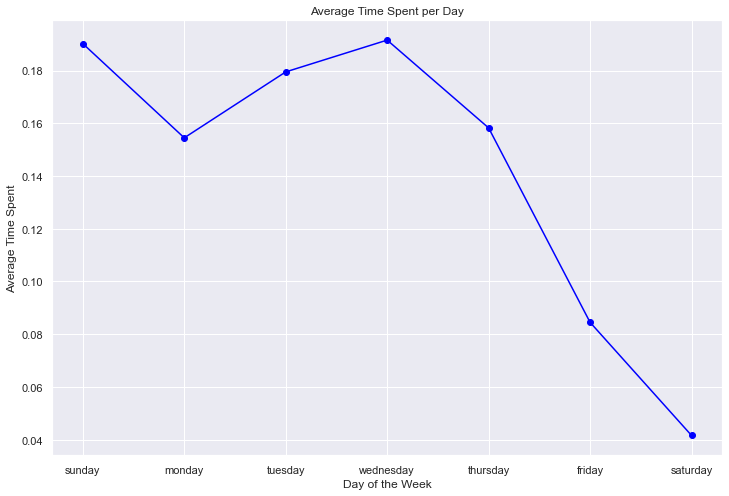

In [35]:

# Calculate average timeSpent for each day
average_timeSpent = data[['DayInWeek_sunday','DayInWeek_monday', 'DayInWeek_tuesday', 'DayInWeek_wednesday',
                          'DayInWeek_thursday', 'DayInWeek_friday', 'DayInWeek_saturday']].mean()

# Extract the day names without "DayInWeek_"
day_names = [column.split('_')[1] for column in average_timeSpent.index]

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the average timeSpent for each day
ax.plot(day_names, average_timeSpent.values, linestyle='-', marker='o', color='blue')

# Set labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Time Spent')
ax.set_title('Average Time Spent per Day')

# Show the plot
plt.show()
